In [2]:
#import packages
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
#from tensorflow.keras.models import leaky_relu

In [3]:
#load the data
(x_train,y_train),(x_test,y_test) =fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape #check the shape

(60000, 28, 28)

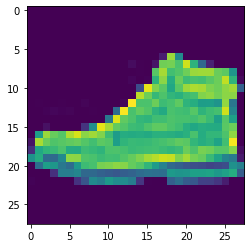

In [5]:
#plotting the image 
plt.imshow(x_train[89])
plt.show()

In [6]:
#checking the shape of y_train
y_train.shape

(60000,)

In [7]:
x_train[50]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   9,   6,
          0,   0,   0,  24,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  67, 209, 231, 248,
        252, 250, 253, 246, 206, 132,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1, 227, 243, 234, 234,
        248, 246, 238, 230, 234, 250, 126,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  57, 231, 213, 227, 234,
        232, 231, 235, 232, 218, 218, 222,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  90, 239, 207, 213, 236,
        235, 232, 232, 229, 210, 215, 207,   6,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 211, 245, 229, 197, 220,
        221, 221, 222, 203, 221, 235, 222,  96,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
# flattening of our matrix to a vector of input_shape 784
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])

In [9]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [10]:
x_train.shape

(60000, 784)

In [11]:
y_train[5]

2

In [12]:
#converting it into a one-hot encoding form
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [14]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
#normalization of the x_train and x_test : Now to pixel intensity values will change from 0-255 to 0-1
x_train = x_train/255
x_test = x_test/255

In [16]:
#defining the type of model
model = Sequential()

In [17]:

model.add(Dense(64,activation='relu',input_shape = (784,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
#getting the summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [19]:
#compile the model by giving the loss function and the type of optimizer you need
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [20]:

#train the data
history = model.fit(x_train,y_train,batch_size = 200, epochs = 10)

Epoch 1/10
300/300 [==============================] - 2s 3ms/step - loss: 0.9267 - accuracy: 0.6725
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.4302 - accuracy: 0.8510
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3872 - accuracy: 0.8612
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3613 - accuracy: 0.8702
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3476 - accuracy: 0.8749
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3342 - accuracy: 0.8775
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3172 - accuracy: 0.8851
Epoch 8/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3040 - accuracy: 0.8879
Epoch 9/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2916 - accuracy: 0.8956
Epoch 10/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2938 - accuracy: 0.8917

In [22]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3569 - accuracy: 0.8741


[0.3568679392337799, 0.8741000294685364]